## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
#importing the dataset
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
#normal eda with the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
#dimensions of the data
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [6]:
#number of unique ids
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
#number of unique users who have converted
df.query('converted==1').user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
# users dont match
df[((df['group']=='treatment')==(df['landing_page']=='new_page'))==False].shape[0]

3893

f. Do any of the rows have missing values?

In [9]:
#null in diffrent col
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#users dont match should be removed
df2=df.query('(group=="control" & landing_page=="old_page") or (group=="treatment" & landing_page=="new_page")')

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]



0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

In [13]:
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated(subset=['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
df2=df2.drop_duplicates(subset=['user_id'],keep='last')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


In [17]:
#there were no duplicate uder row in the dataset
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
#df2.converted.sum()/len(df2) (34737)/290584
df2.converted.sum()/df2.converted.count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [61]:
#
con_df2 = df2.query(" group == 'control' ")
con_rate=con_df2.converted.sum()/len(con_df2)
#df.converted.sum()/len(df)

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [62]:
tret_df2 = df2.query(" group == 'treatment' ")
tret_rate=tret_df2.converted.sum()/len(tret_df2)

In [63]:
diff=tret_rate-con_rate
diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [64]:
np_df2 = df2.query(" landing_page == 'new_page' ")
np_df2.shape[0]/len(df2)

0.5000619442226688

In [65]:
op_df2 = df2.query(" landing_page == 'old_page' ")
op_df2.shape[0]/len(df2)

0.4999380557773312

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

As we can see control scored higher Conversion rate than the treatment but its not possible to tell because asser this satatement as the diffrence is too low and there is a chance for randomness.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

the null hypothesis would be 
p_new would be less than or equal to p_old
alternate hypothesis would be 
p_new would be greater than p_old

Ho : P_new - P_old <= 0

Hi  : P_new - P_old  > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [66]:
p_new=df.converted.mean()
p_new

0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [67]:
p_old=df.converted.mean()
p_old

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [68]:
n_new=df.query('landing_page == "new_page"').shape[0]
n_new

147239

d. What is $n_{old}$, the number of individuals in the control group?

In [69]:
n_old=df.query('landing_page == "old_page"').shape[0]
n_old

147239

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [70]:
npg_con=np.random.binomial(2,p_new,n_new)
npg_con

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
npgc=npg_con.mean()
npgc

0.23953572083483315

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [72]:
opg_con=np.random.binomial(1,p_old,n_old)
opg_con

array([0, 0, 1, ..., 0, 1, 0])

In [73]:
oppc=opg_con.mean()
oppc

0.11971013114731831

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [74]:
npgc-oppc

0.11982558968751485

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [75]:
# p_diffs=[]
# for i in range(10000):
#     npg_con=np.random.binomial(1,p_new,n_new)
#     opg_con=np.random.binomial(1,p_old,n_old)
#     npgc=npg_con.mean()
#     opgc=opg_con.mean()
#     diff=npgc-opgc
#     p_diffs.append(diff)
    
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

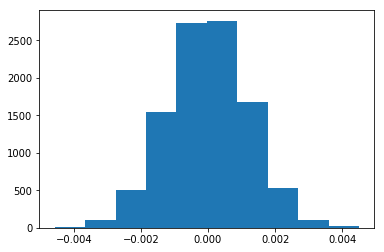

In [76]:
plt.hist(p_diffs);

this is similar to normal distribution graph(all the p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [77]:
con=df2[df2['group']=='control']['converted'].mean()
con

0.1203863045004612

In [78]:
treat=df2[df2['group']=='treatment']['converted'].mean()
treat

0.11880806551510564

In [79]:
diff=con-treat
diff

0.0015782389853555567

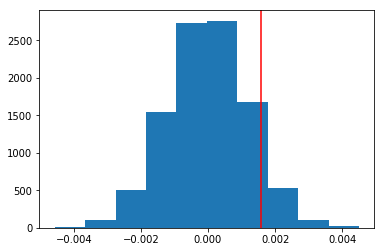

In [80]:
plt.hist(p_diffs);
plt.axvline(x=diff,color='red');

In [82]:
(p_diffs<diff).mean()

0.90669999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part 

- As the p_value is .907(static) we can not assert that the new page is better than the old page.as the alpha vale taken is .05
Ans
**j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

.09 (static) of all the sample is from null region and so we fail to reject the null hypothesis.

here p value is greater that .05 so we can't reject the null hypothesis.

**Put your answer here.**

As the p_value is .907(static) we can not assert that the new page is better than the old page.as the alpha vale taken is .05

90.7% (static) of all the sample is from null region and so we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [84]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" and converted==1').shape[0]
convert_new =df2.query('landing_page=="new_page" and converted==1').shape[0]
n_old = df2.query('landing_page=="old_page"').shape[0]
n_new = df2.query('landing_page=="new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [85]:
count=np.array([convert_old,convert_new])
nobs=np.array([n_old,n_new])

citation =https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

In [86]:
z_score,p_score=sm.stats.proportions_ztest(count,nobs,alternative='smaller')
z_score,p_score

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

z-score is a quantitative mesurement of how the sample is compared to the whole population and if the z-score is 1 then it means it is one standard deviation above the mean.
if it is negative it means the sample mean is less than the population mean.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

logistic regression as it converts the regressive value to boolean type(sigmoid is used).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [87]:
df2.head()

,user_id,timestamp,group,landing_page,converted,x_intercept,a_page,b_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [88]:
df2['x_intercept']=1
df2[['a_page','b_page']]=pd.get_dummies(df2['group'])
df2

,user_id,timestamp,group,landing_page,converted,x_intercept,a_page,b_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [89]:
import statsmodels.api as sm
log_r=sm.Logit(df2['converted'],df2[['x_intercept','a_page']])
lr=log_r.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [90]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2019   Pseudo R-squ.:               8.077e-06
Time:                        00:00:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
x_intercept    -2.0038      0.008   -247.146      0.000      -2.020      -1.988
a_page          0.0150      0.011      1.311      0.190      -0.007       0.037
===============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?


**Put your answer here.**
In the logistic regression the p value for ab_page is .190(or 19%) and in the ab test we got .905. 

In regression hull hypothesis is that we new page Conversion rate is qual to old page conversion rate. so this is a two tailed test so the results were diffrent one tailed test we happened to do in part 2.
both the results are diffrent as we one is two tailes and other was one tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

more factors could be added so that we have a effective and accurate model. but many vatriables means multi collinearity and adj r2 will reduce.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [91]:
df1=pd.read_csv('countries.csv')
df1.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [93]:
df1.describe()

,user_id
count,290584.000000
mean,788004.876222
std,91224.735468
min,630000.000000
25%,709034.750000
50%,787995.500000
75%,866956.250000
max,945999.000000


In [94]:
df1.shape

(290584, 2)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [95]:
df1.user_id.nunique()

290584

In [96]:
df1['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [97]:
df_final=df1.set_index('user_id').join(df2.set_index('user_id'),how='inner')
df_final

,country,timestamp,group,landing_page,converted,x_intercept,a_page,b_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,0,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,0,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,0,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,0,1


In [98]:
df_final[['UK','CA','US']]=pd.get_dummies(df_final['country'])
df_final.head()

,country,timestamp,group,landing_page,converted,x_intercept,a_page,b_page,UK,CA,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [99]:
logr=sm.Logit(df_final['converted'],df_final[['x_intercept','US','UK']])
fit_model=logr.fit()
fit_model.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Oct 2019   Pseudo R-squ.:               1.521e-05
Time:                        00:00:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
x_intercept    -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US             -0.0099      0.013     -0.746      0.456      -0.036       0.016
UK             -0.0507      0.028     -1.786      0.074      -0.106       0.005
===============================================================================
"""

In [100]:
df_final['CApage']=df_final['CA']*df_final['a_page']
df_final['USpage']=df_final['US']*df_final['a_page']
df_final['UKpage']=df_final['UK']*df_final['a_page']
df_final.head()

,country,timestamp,group,landing_page,converted,x_intercept,a_page,b_page,UK,CA,US,CApage,USpage,UKpage
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0,0


In [101]:
logr1=sm.Logit(df_final['converted'],df_final[['x_intercept','a_page','CA','UK','CApage','UKpage']])
fit_model1=logr1.fit()
fit_model1.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Oct 2019   Pseudo R-squ.:               3.482e-05
Time:                        00:00:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
x_intercept    -2.0070      0.010   -207.045      0.000      -2.026      -1.988
a_page          0.0206      0.014      1.505      0.132      -0.006       0.047
CA              0.0257      0.019      1.363      0.173      -0.011       0.063
UK             -0.0644      0.038     -1.679      0.093      -0.140       0.011
CApage         -0.0314      0.027     -1.181      0.238      -0.084       0.021
UKpage          0.0469      0.054      0.872      0.383      -0.059       0.152
===============================================================================
"""

from regression model we can see that none of the variables given were significant with coef(.027)  and p_val(.155) being low the country and the country webpage are not significant and would not make our learning model any good. so we can drop the variable.

## Conclusion

From the results of A/B test we fail to reject the null hypothesis as p_val shows all the variables are not significant at alpha (.05).so the firm must run this test longer to get some insights and then take correct decision.as of not the conversion rate of both the pages are not significantly diffrent.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [102]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0